In [197]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns

In [198]:
df = pd.read_csv('../data/ufc-fighters-statistics.csv')
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [199]:
duplicates = df['name'].duplicated(keep=False)
df[duplicates]

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
501,Michael McDonald,Mayday,17,4,0,175.26,61.23,177.80,Orthodox,1991-01-15,2.69,42.0,2.76,57.0,1.09,66.0,52.0,1.4
1478,Bruno Silva,Bulldog,13,5,2,162.56,56.70,165.10,Orthodox,1990-03-16,3.05,46.0,3.09,59.0,2.57,30.0,64.0,0.3
1598,Mike Davis,Beast Boy,10,2,0,182.88,70.31,182.88,Orthodox,1992-10-07,5.83,52.0,6.20,56.0,3.04,53.0,69.0,0.2
1829,Jean Silva,Lord Assassin,11,2,0,170.18,65.77,175.26,Orthodox,1996-12-13,5.80,48.0,4.73,55.0,1.00,33.0,100.0,0.0
1932,Joey Gomez,KO King,6,2,0,177.80,61.23,185.42,Orthodox,1986-07-21,2.44,28.0,4.46,55.0,0.62,100.0,50.0,0.0
2089,Joey Gomez,NaN,7,1,0,177.80,70.31,180.34,Orthodox,1989-08-29,3.73,49.0,3.33,50.0,2.00,28.0,0.0,0.0
2404,Michael McDonald,The Black Sniper,1,1,0,180.34,92.99,NaN,Orthodox,1965-02-06,0.00,0.0,0.40,50.0,0.00,0.0,0.0,0.0
2560,Bruno Silva,Blindado,23,10,0,182.88,83.91,187.96,Orthodox,1989-07-13,4.43,51.0,5.33,43.0,1.09,27.0,73.0,0.0
2736,Tony Johnson,NaN,11,3,0,185.42,120.20,NaN,NaN,NaN,2.00,53.0,4.73,31.0,2.00,22.0,0.0,0.0
2789,Tony Johnson,NaN,7,2,0,187.96,92.99,193.04,Orthodox,1983-05-02,4.00,92.0,3.67,22.0,0.00,0.0,90.0,0.0


In [200]:
df2 = df[~duplicates]

In [201]:
def plot_hist(list_of_columns, dataframe):
    fig, axs = plt.subplots(7, 2, figsize=(10, 25))
    
    for i, column in enumerate(list_of_columns):
        row = i // 2
        col = i % 2
        axs[row, col].hist(dataframe[column], bins=20, color='skyblue', edgecolor='black')
        axs[row, col].set_title(column)
        axs[row, col].set_xlabel('value')
        axs[row, col].set_ylabel('frequency')
        
    plt.tight_layout()
    plt.show()

In [202]:
columns_to_visualize = ['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense', 'average_submissions_attempted_per_15_minutes']

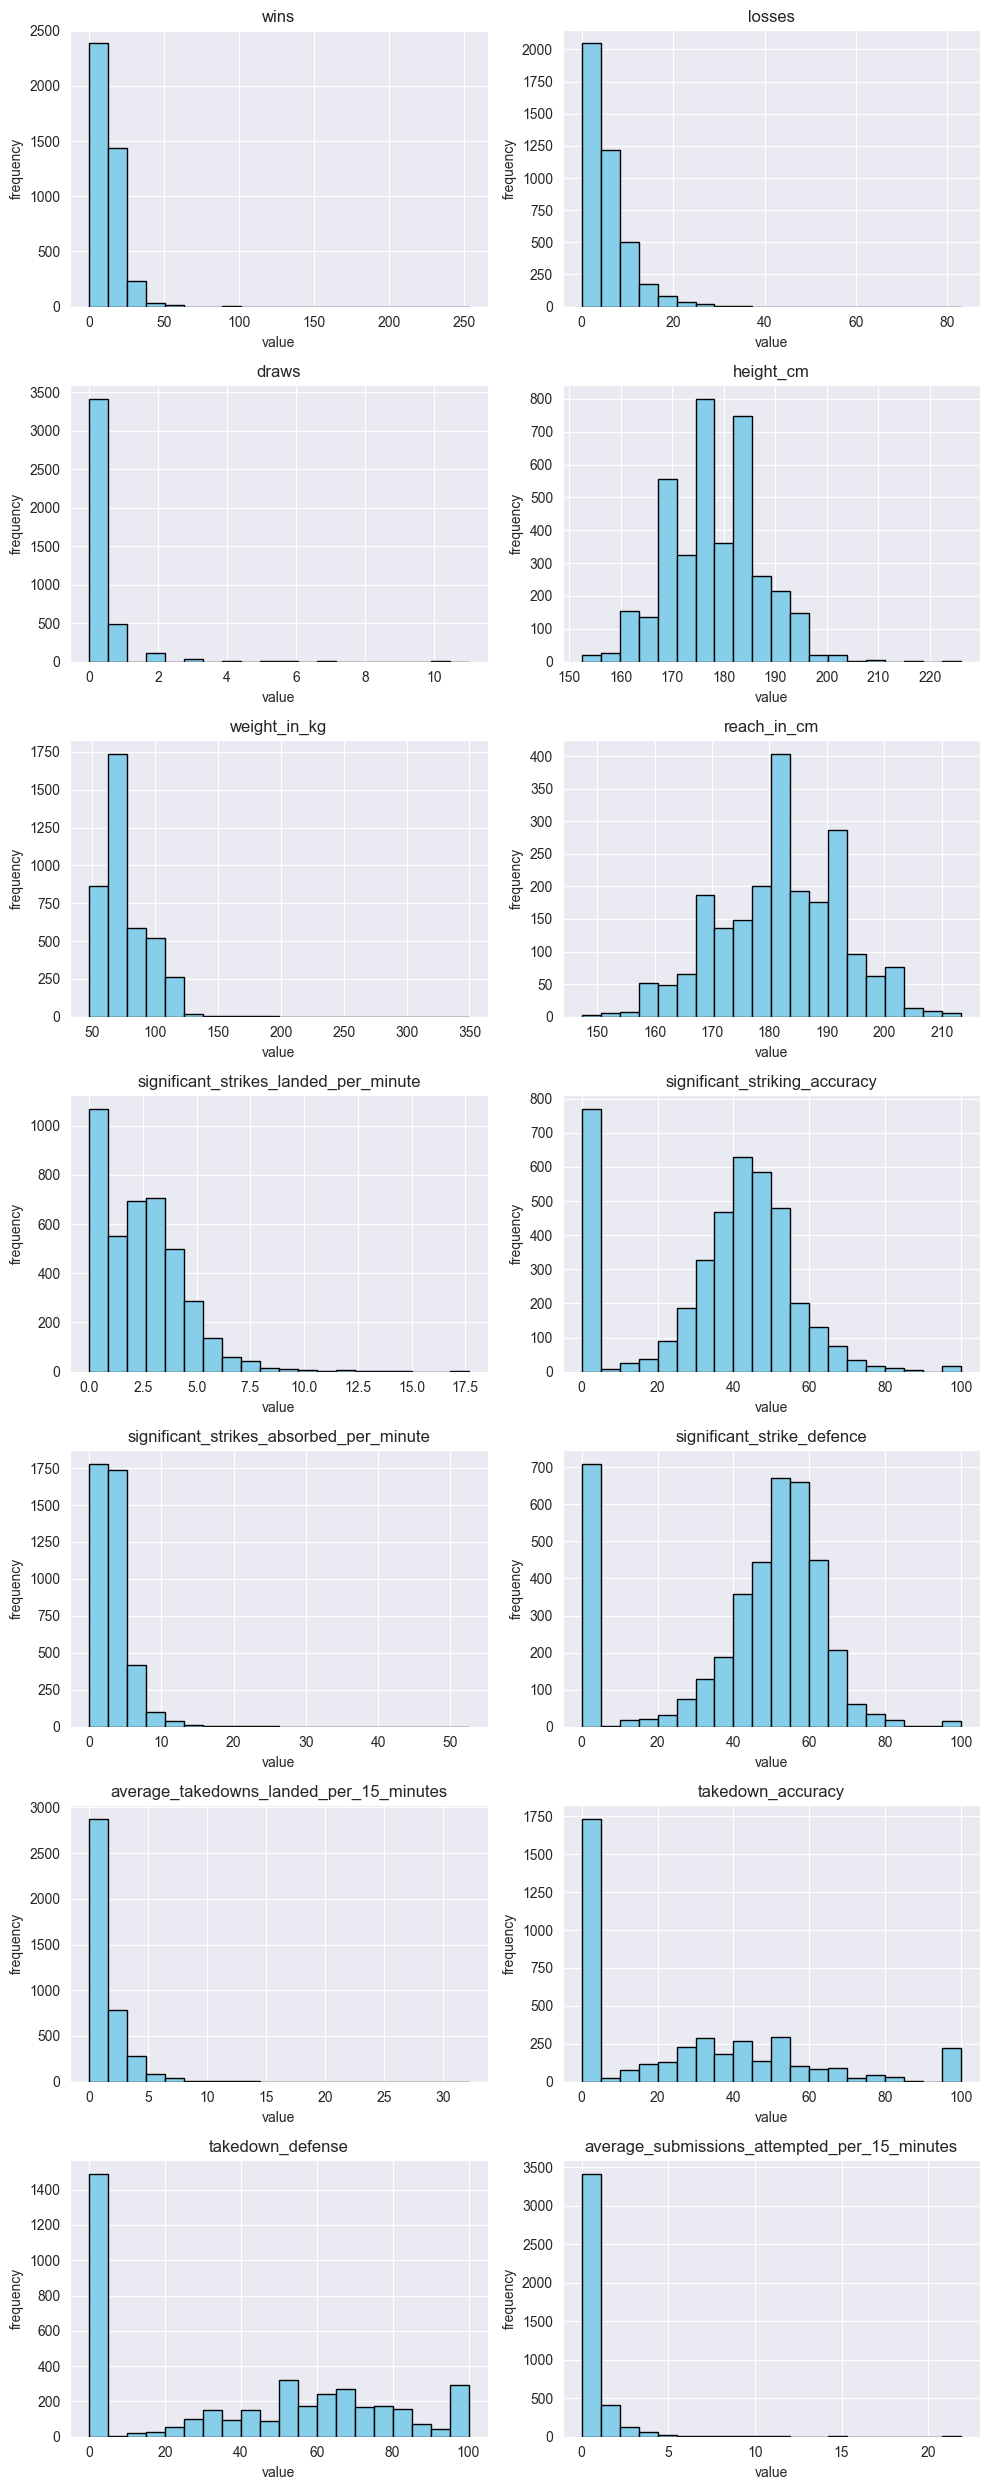

In [203]:
plot_hist(columns_to_visualize, df2)

In [204]:
df3 = df2.drop(df2[(df2['significant_striking_accuracy'] == 0) | (df2['significant_striking_accuracy'] == 100) | (df2['significant_strike_defence'] == 0) | (df2['significant_strike_defence'] == 100) | (df2['takedown_accuracy'] == 0) | (df2['takedown_accuracy'] == 100) | (df2['takedown_defense'] == 0) | (df2['takedown_defense'] == 100)].index)

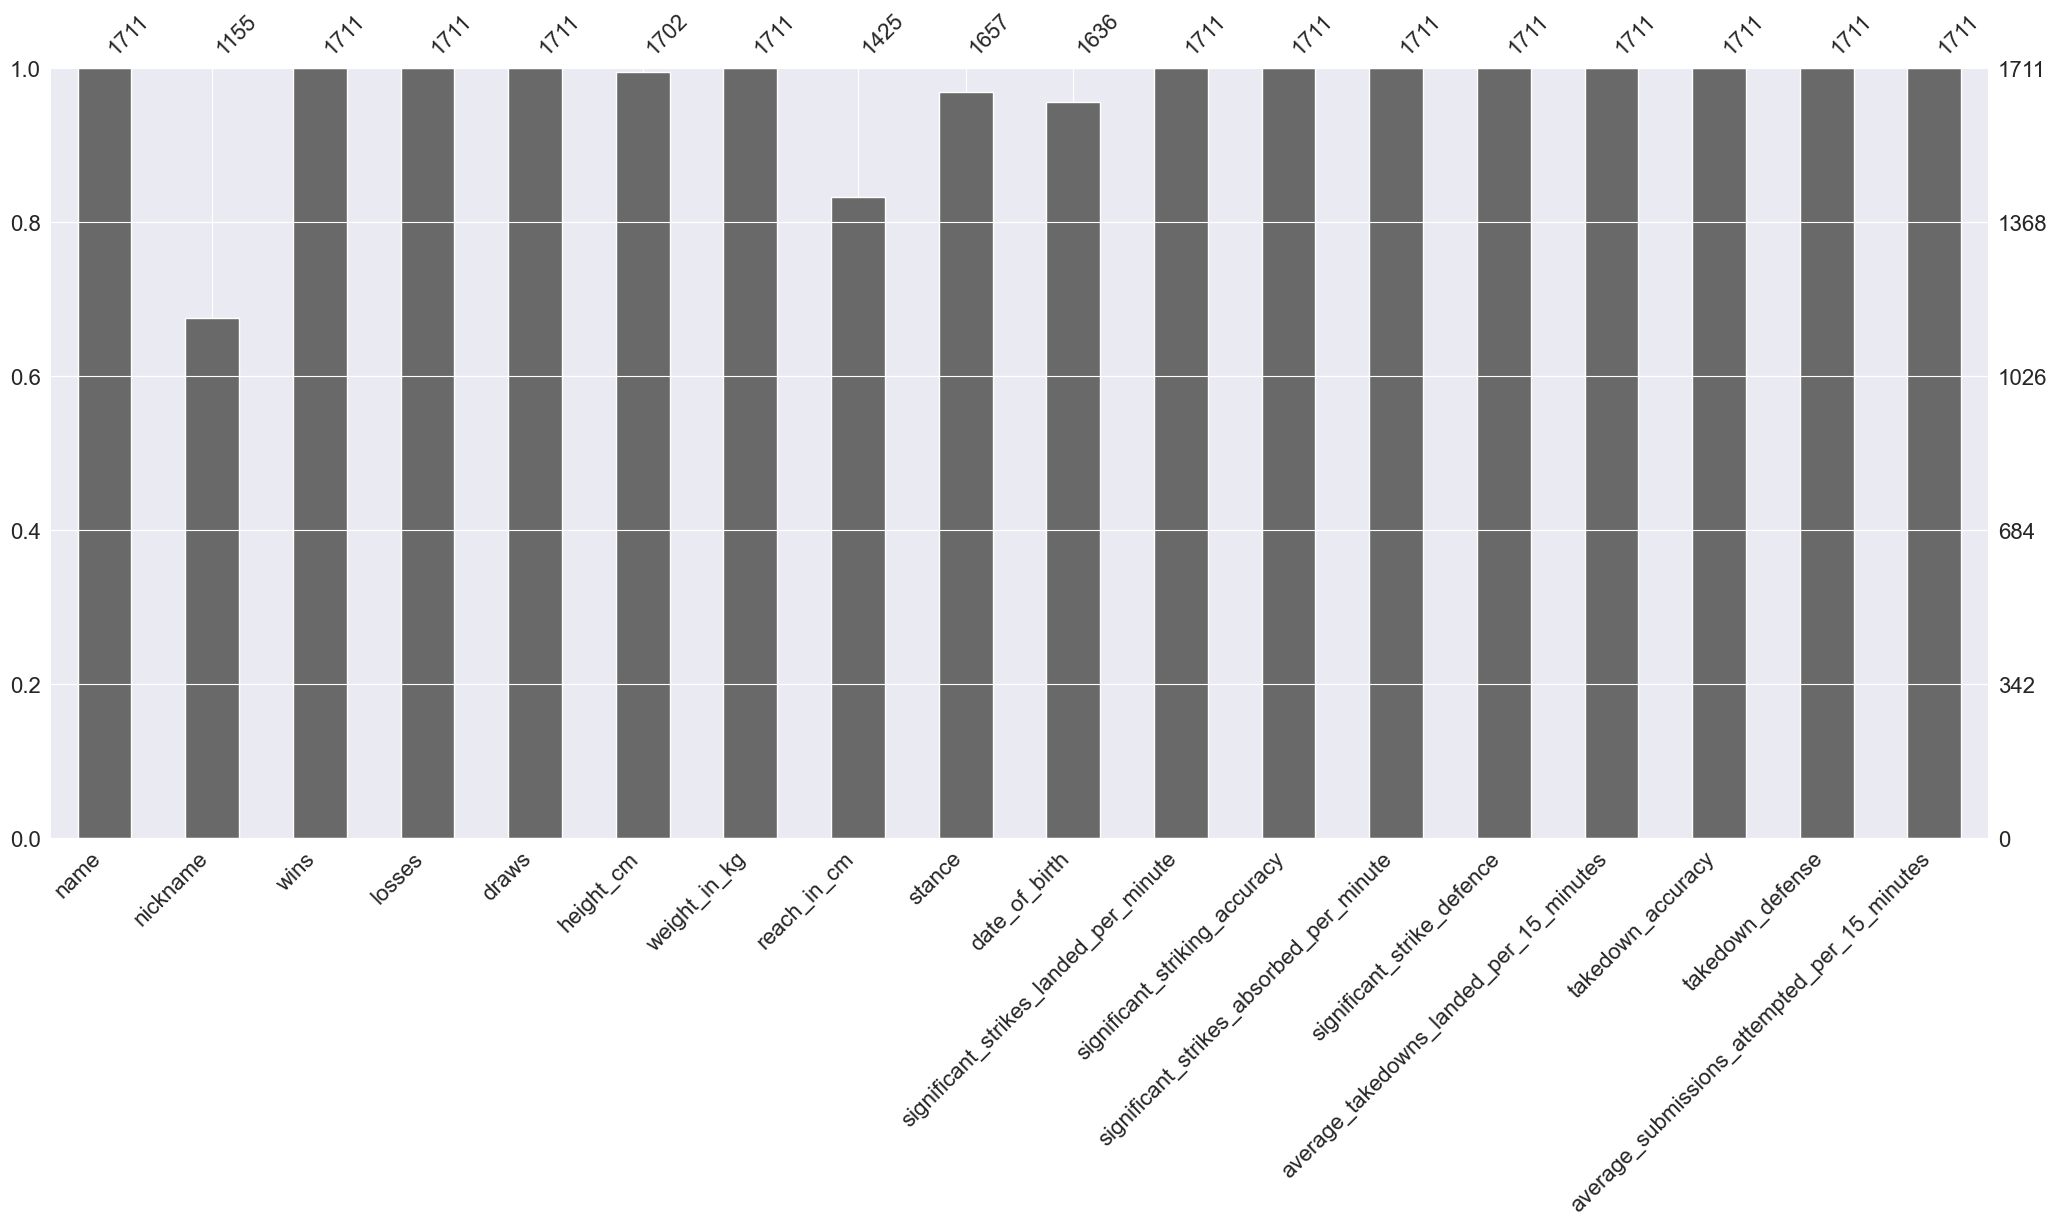

In [205]:
msno.bar(df3);

In [206]:
df3.isnull().sum() / len(df3) * 100

name                                             0.000000
nickname                                        32.495617
wins                                             0.000000
losses                                           0.000000
draws                                            0.000000
height_cm                                        0.526008
weight_in_kg                                     0.000000
reach_in_cm                                     16.715371
stance                                           3.156049
date_of_birth                                    4.383402
significant_strikes_landed_per_minute            0.000000
significant_striking_accuracy                    0.000000
significant_strikes_absorbed_per_minute          0.000000
significant_strike_defence                       0.000000
average_takedowns_landed_per_15_minutes          0.000000
takedown_accuracy                                0.000000
takedown_defense                                 0.000000
average_submis

In [207]:
columns_to_remove = ['nickname', 'date_of_birth']
df4 = df3.drop(columns_to_remove, axis=1)

In [208]:
df5 = df4.copy()

impute_mean = SimpleImputer(strategy='mean')
impute_mode = SimpleImputer(strategy='most_frequent')

df5[['height_cm', 'weight_in_kg', 'reach_in_cm']] = impute_mean.fit_transform(df5[['height_cm', 'weight_in_kg', 'reach_in_cm']])
df5[['stance']] = impute_mode.fit_transform(df5[['stance']])

In [209]:
df5

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
26,Poppies Martinez,29,11,0,175.26,65.77,181.386302,Orthodox,2.88,50.0,2.16,51.0,1.54,33.0,50.0,9.2
28,Daniel Puder,8,0,0,190.50,106.59,181.386302,Orthodox,2.77,68.0,1.17,38.0,1.21,50.0,81.0,9.0
42,Paul Sass,14,2,0,182.88,70.31,185.420000,Orthodox,0.53,26.0,1.90,51.0,0.53,16.0,33.0,7.4
51,Jason Black,23,4,1,172.72,70.31,181.386302,Orthodox,1.06,47.0,2.60,45.0,0.48,33.0,28.0,6.2
59,Rob MacDonald,5,4,0,190.50,92.99,198.120000,Orthodox,1.80,50.0,2.04,46.0,7.19,80.0,80.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,Shinsho Anzai,10,3,0,170.18,77.11,177.800000,Orthodox,3.23,58.0,3.75,45.0,1.83,16.0,75.0,0.0
4081,Dusko Todorovic,12,4,0,185.42,83.91,187.960000,Orthodox,5.54,57.0,4.55,46.0,0.96,12.0,45.0,0.0
4091,John Cofer,8,4,0,175.26,70.31,181.386302,Southpaw,2.73,41.0,3.43,62.0,1.22,50.0,64.0,0.0
4093,Alejandro Garcia,14,10,0,170.18,65.77,181.386302,Orthodox,1.22,62.0,1.14,65.0,8.55,87.0,66.0,0.0


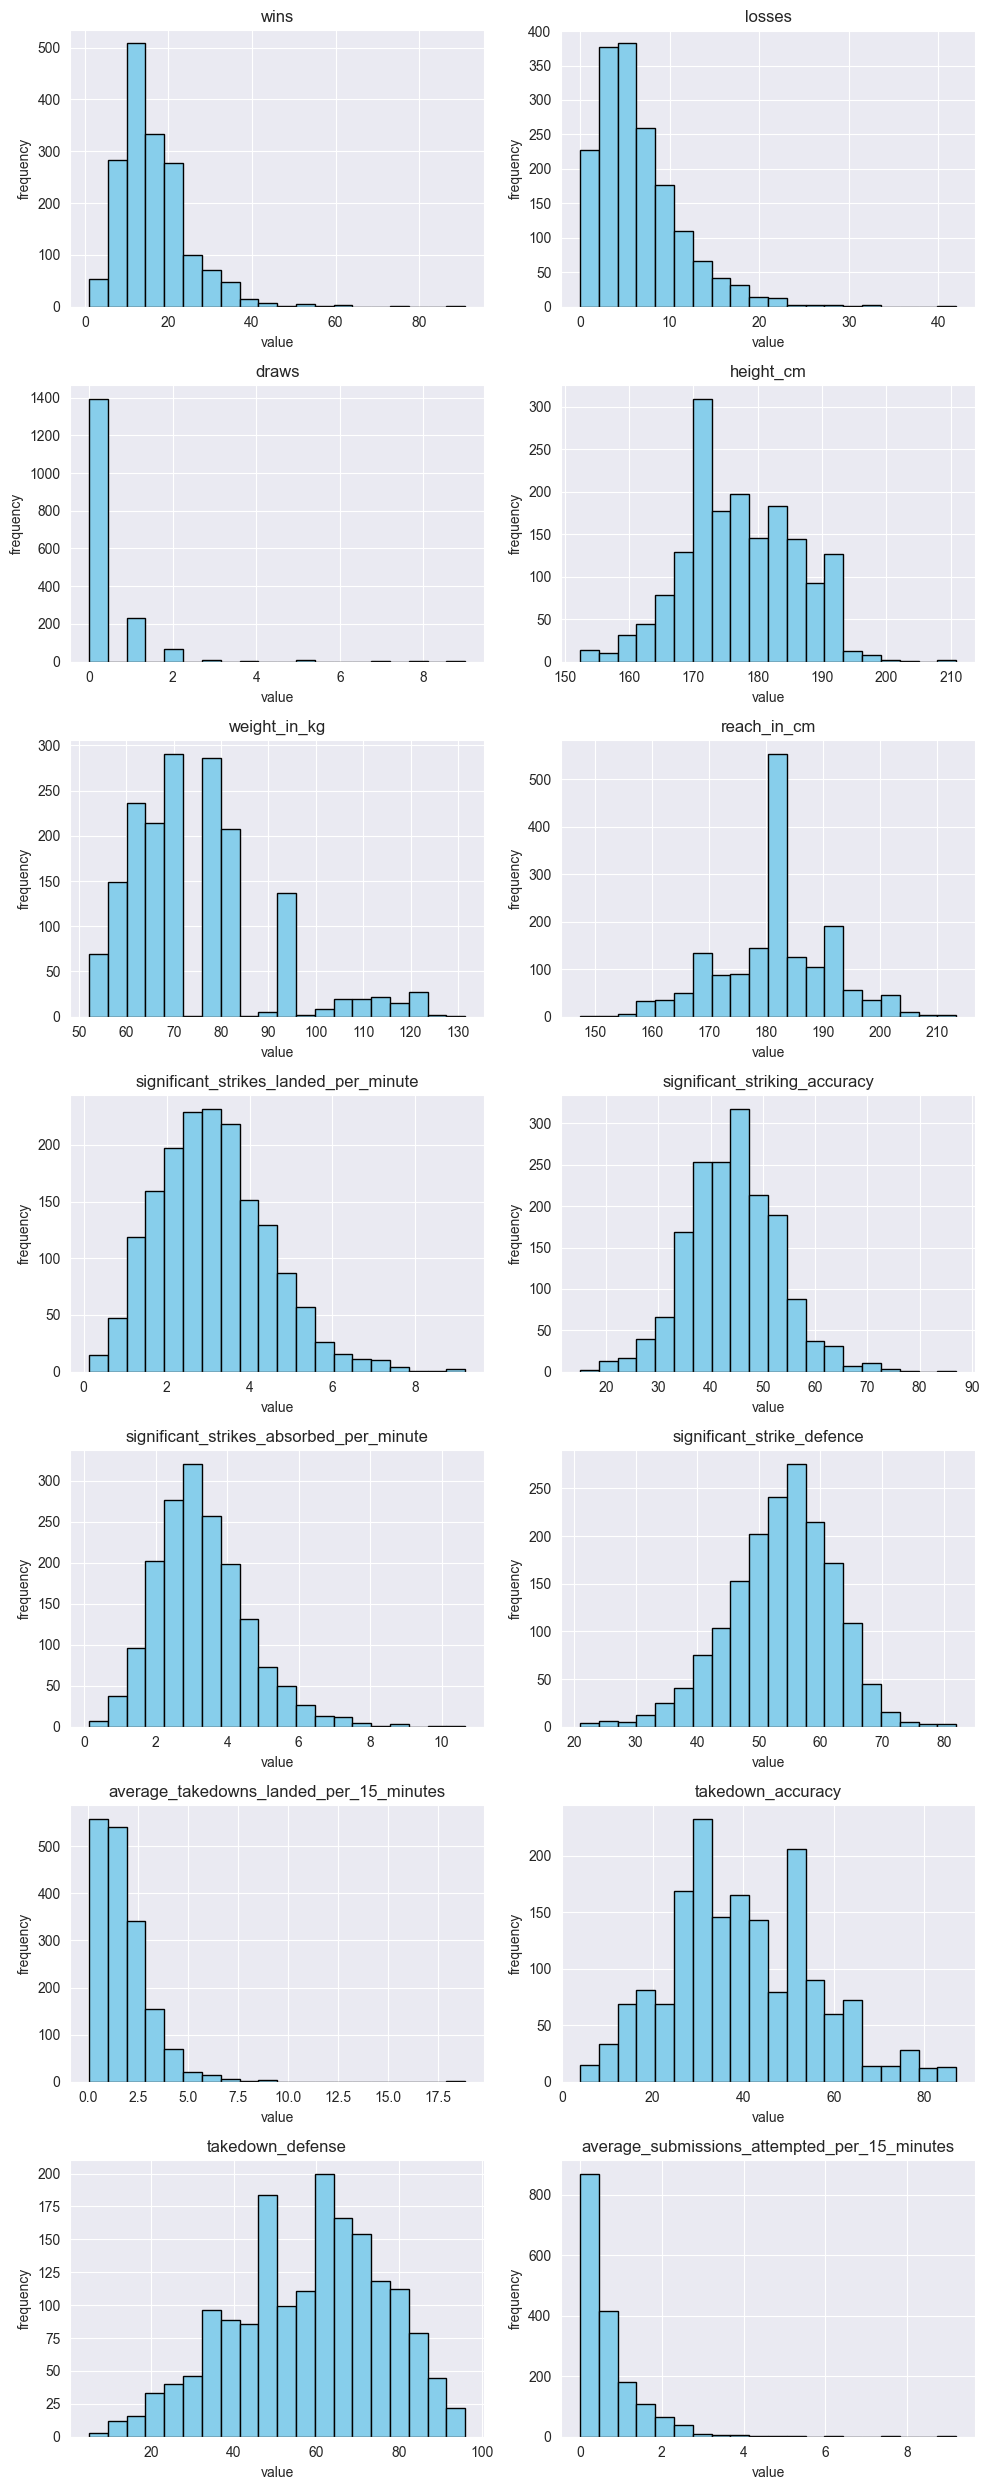

In [210]:
plot_hist(columns_to_visualize, df5)

In [211]:
df5['win_percentage'] = df5['wins'] / (df5['wins'] + df5['losses'] + df5['draws'])
df5['wins_losses'] = df5['wins'] - df5['losses']

In [212]:
df5

,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,win_percentage,wins_losses
26,Poppies Martinez,29,11,0,175.26,65.77,181.386302,Orthodox,2.88,50.0,2.16,51.0,1.54,33.0,50.0,9.2,0.725000,18
28,Daniel Puder,8,0,0,190.50,106.59,181.386302,Orthodox,2.77,68.0,1.17,38.0,1.21,50.0,81.0,9.0,1.000000,8
42,Paul Sass,14,2,0,182.88,70.31,185.420000,Orthodox,0.53,26.0,1.90,51.0,0.53,16.0,33.0,7.4,0.875000,12
51,Jason Black,23,4,1,172.72,70.31,181.386302,Orthodox,1.06,47.0,2.60,45.0,0.48,33.0,28.0,6.2,0.821429,19
59,Rob MacDonald,5,4,0,190.50,92.99,198.120000,Orthodox,1.80,50.0,2.04,46.0,7.19,80.0,80.0,5.4,0.555556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,Shinsho Anzai,10,3,0,170.18,77.11,177.800000,Orthodox,3.23,58.0,3.75,45.0,1.83,16.0,75.0,0.0,0.769231,7
4081,Dusko Todorovic,12,4,0,185.42,83.91,187.960000,Orthodox,5.54,57.0,4.55,46.0,0.96,12.0,45.0,0.0,0.750000,8
4091,John Cofer,8,4,0,175.26,70.31,181.386302,Southpaw,2.73,41.0,3.43,62.0,1.22,50.0,64.0,0.0,0.666667,4
4093,Alejandro Garcia,14,10,0,170.18,65.77,181.386302,Orthodox,1.22,62.0,1.14,65.0,8.55,87.0,66.0,0.0,0.583333,4


In [213]:
divisions = {'flyweight': [0, 56.7], 'bantamweight': [56.7, 61.2], 'featherweight': [61.2, 65.8], 'lightweight': [65.7, 70.3], 'welterweight': [70.3, 77.1], 'middleweight': [70.3, 83.9], 'light_heavyweight': [83.9, 93.0], 'heavyweight': [93.0, 150]}

In [214]:
def get_weight_class(weight):
    for division, bounds in divisions.items():
        if bounds[0] <= weight < bounds[1]:
            return division
    return None
df5['weight_class'] = df5['weight_in_kg'].apply(get_weight_class)

In [215]:
def plot_distribution(column, distribution='norm'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    sns.kdeplot(column, ax=axs[0])
    stats.probplot(column, dist=distribution, plot=axs[1])
    plt.show()

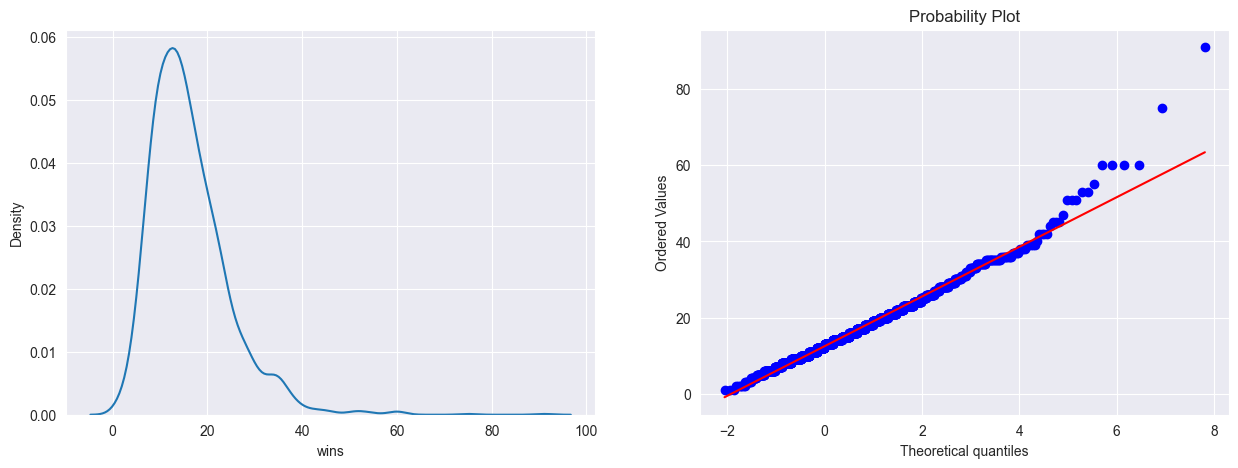

In [216]:
plot_distribution(df5['wins'], 'gumbel_r')

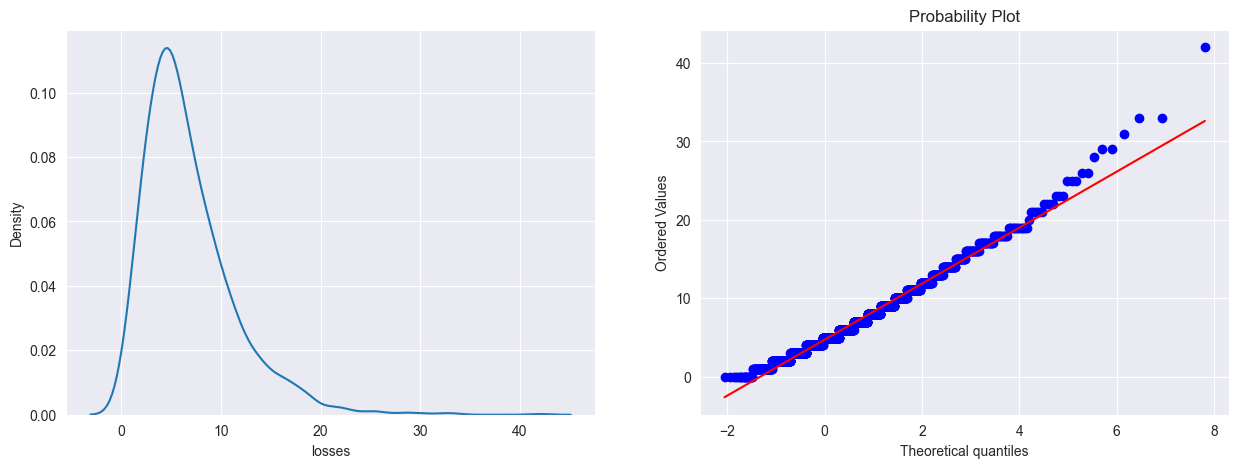

In [217]:
plot_distribution(df5['losses'], 'gumbel_r')

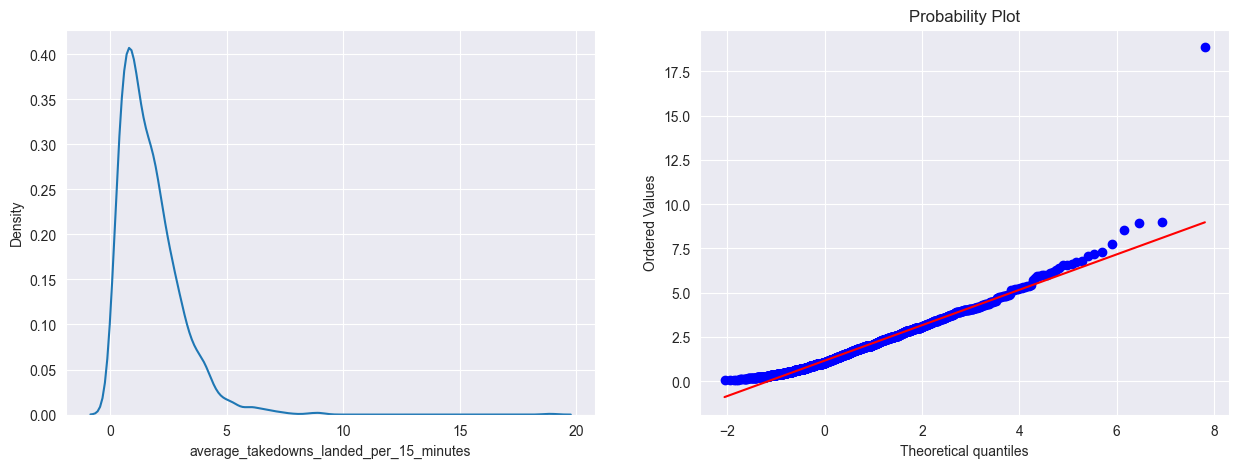

In [218]:
plot_distribution(df5['average_takedowns_landed_per_15_minutes'], distribution='gumbel_r')

In [219]:
df5.to_csv('../data/cleaned_data.csv', index=False)